In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from disp import set_plot, plot_b


cc = np.concatenate

FPS = 30.03  # sampling rate of behavioral data
DT = 1/FPS

STRAINS = ['NM91', 'ZH23']
FSTRAIN = 'data/simple/strains.csv'

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

PFX_BHV_XTD = 'data/simple/behav_xtd/behav_xtd'

TARGS = ['MTN_MN_1']

In [2]:
# load natural songs
df_song = pd.read_csv('data/simple/c_song_f_behav.csv')[['ID', 'T', 'Q', 'S', 'P' ,'F']]
sngs_full = []
bhvs_full = {targ: [] for targ in TARGS}
for itr in ISTRAIN:
    sys.stdout.write('.')
    
    df_tr = df_song[df_song['ID'] == itr]
    sng_full = np.zeros(len(df_tr), dtype=int)
    sng_full[df_tr['S'] == 1] = 1
    sng_full[(df_tr['P'] == 1) | (df_tr['F'] == 1)] = 2
    sngs_full.append(sng_full)
    
    # load corresponding extended behavior file
    df_bhv_xtd = pd.read_csv(f'{PFX_BHV_XTD}_tr_{itr}.csv')
    
    for targ in TARGS:
        vals = np.array(df_bhv_xtd[targ])
        bhvs_full[targ].append(vals)

.......................................................................................

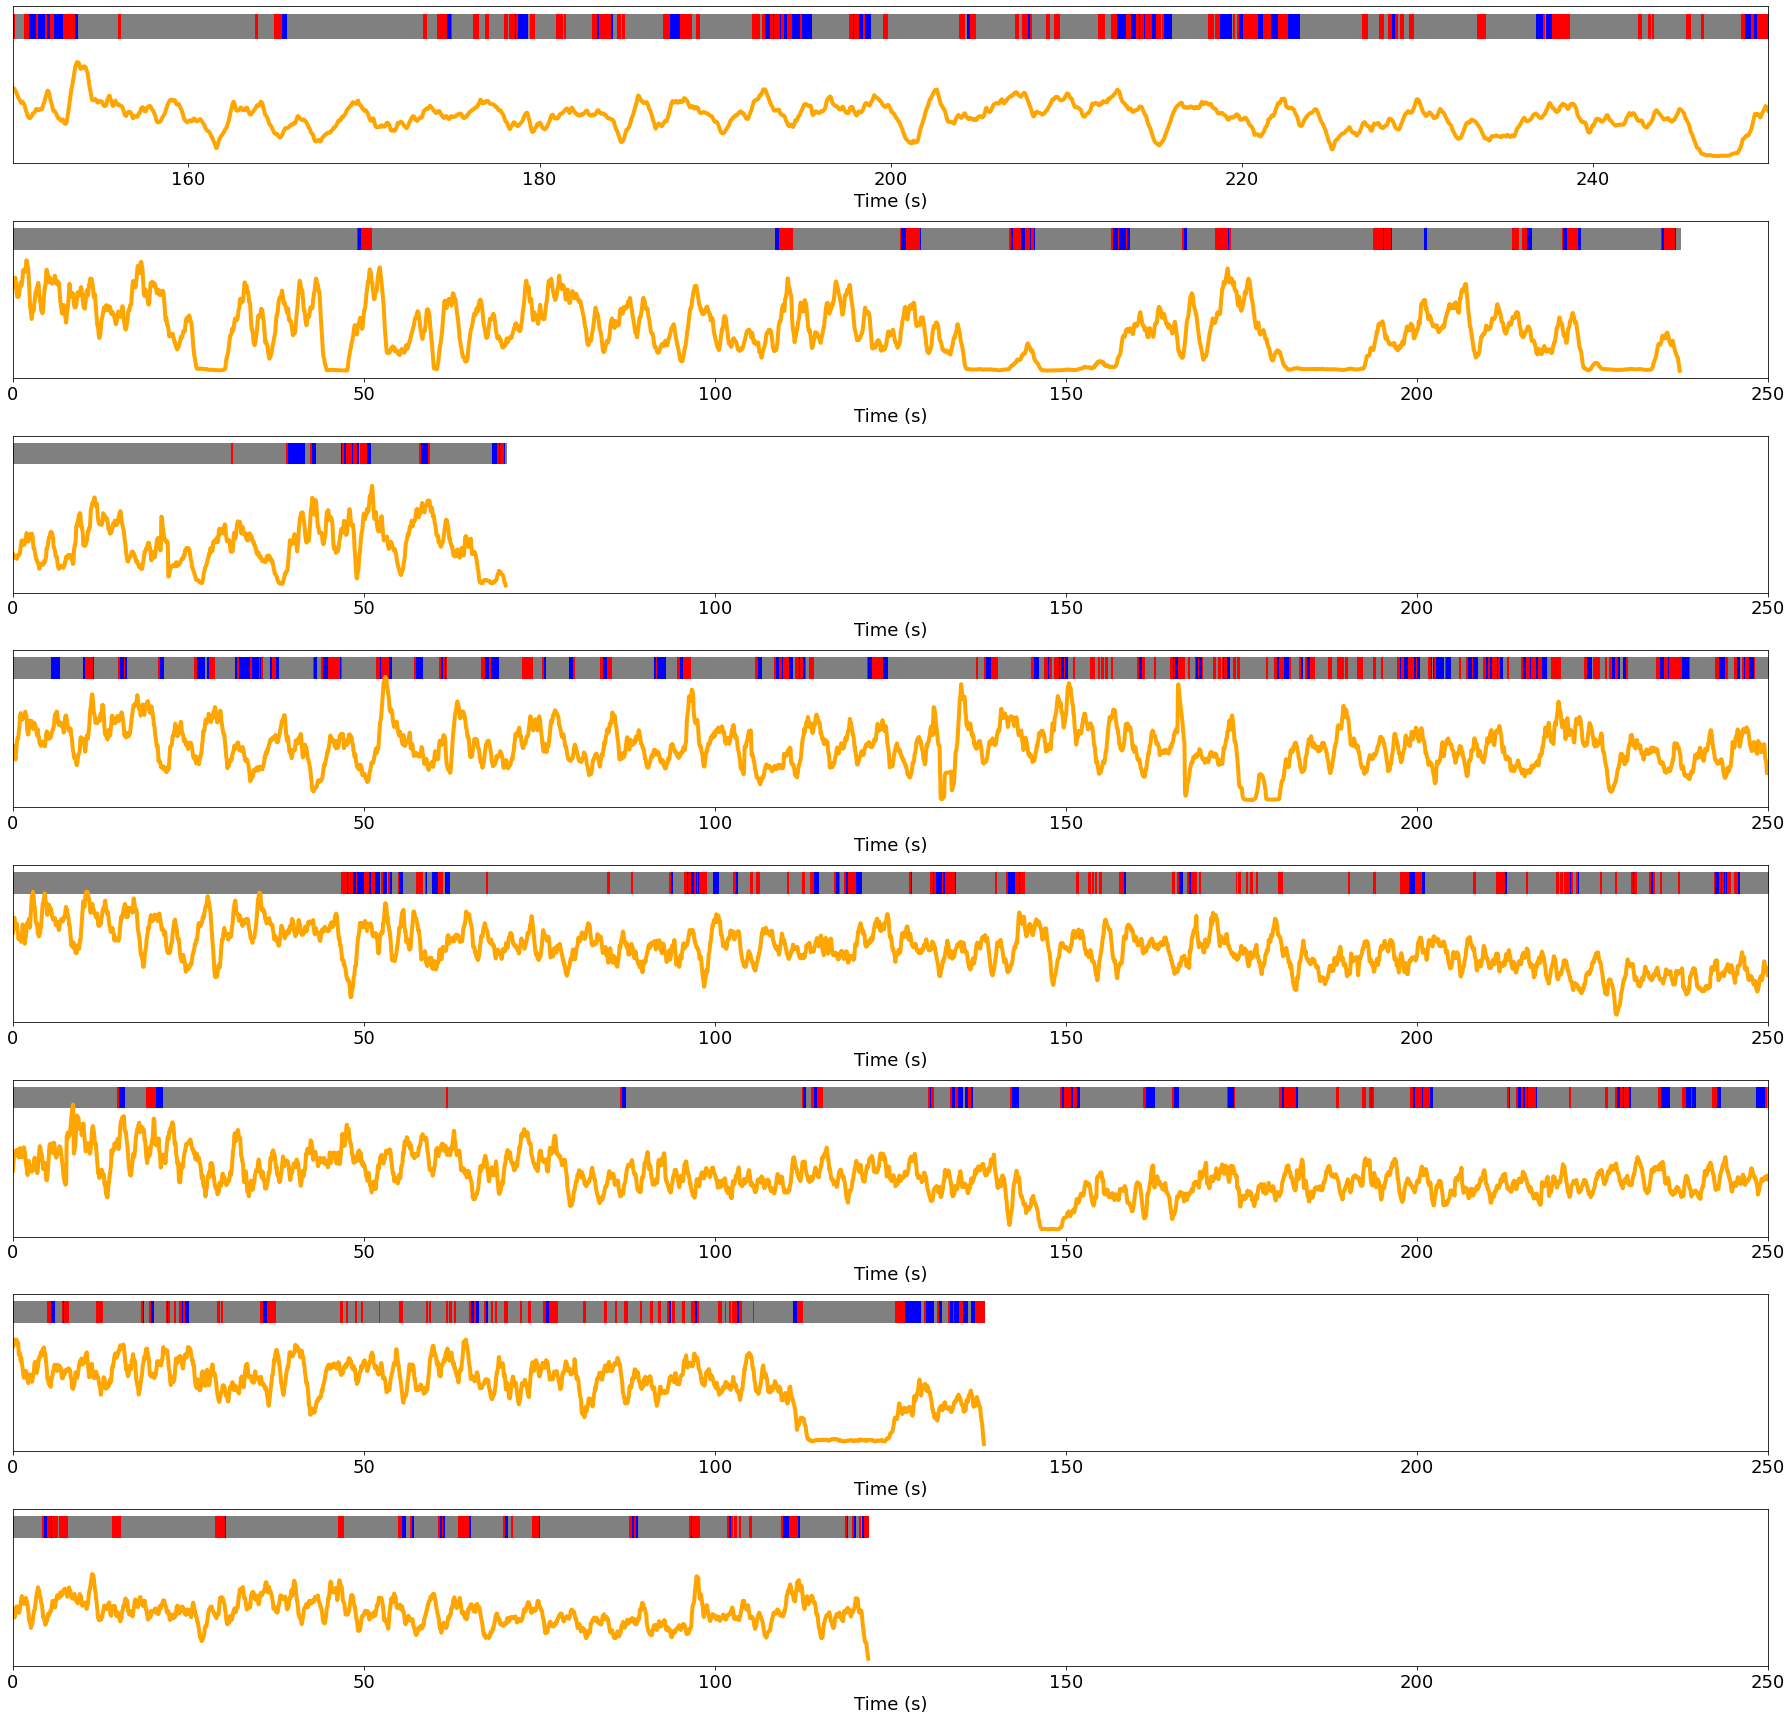

In [4]:
PLOT = [
    (0, 150, 250, .75, .9),
    (1, 0, 250, .6, .7),
    (2, 0, 250, .6, .7),
    (3, 0, 250, .6, .7),
    (4, 0, 250, .6, .7),
    (5, 0, 250, .6, .7),
    (6, 0, 250, .6, .7),
    (7, 0, 250, .6, .7),
]
TARG = 'MTN_MN_1'
fig, axs = plt.subplots(len(PLOT), 1, figsize=(25, 3*len(PLOT)), tight_layout=True)

for ax, sng_full, bhv_full, (itr, t_start, t_stop, y_0, y_1) in zip(axs, sngs_full, bhvs_full[TARG], PLOT):
    t_full = np.arange(len(sng_full)) * DT
    mt = (t_start <= t_full) & (t_full < t_stop)
    
    t = t_full[mt]
    sng = sng_full[mt]
    bhv = bhv_full[mt]
    
    ax.plot(t, bhv, c='orange', lw=4)
    
    plot_b(ax, t, sng, [t_start, min(t_stop, t.max()), y_0, y_1], c=['gray', 'b', 'r'])

    ax.yaxis.set_visible(False)
    
    set_plot(ax, x_lim=(t_start, t_stop), x_label='Time (s)', font_size=18)
    
fig.savefig('ms/fig_1b.svg')